In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree 
import seaborn as sns 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import os

In [32]:
data=pd.read_csv('Heart_Disease_Prediction.csv')

In [33]:
data=data.drop(["index"],axis=1)
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [34]:
y =data.Heart_Disease
X =data.drop('Heart_Disease', axis=1)
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [35]:
one_hot_X = pd.get_dummies(X) # kategorik sütunları ikili bir vektör temsilinde ifade etme
one_hot_X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


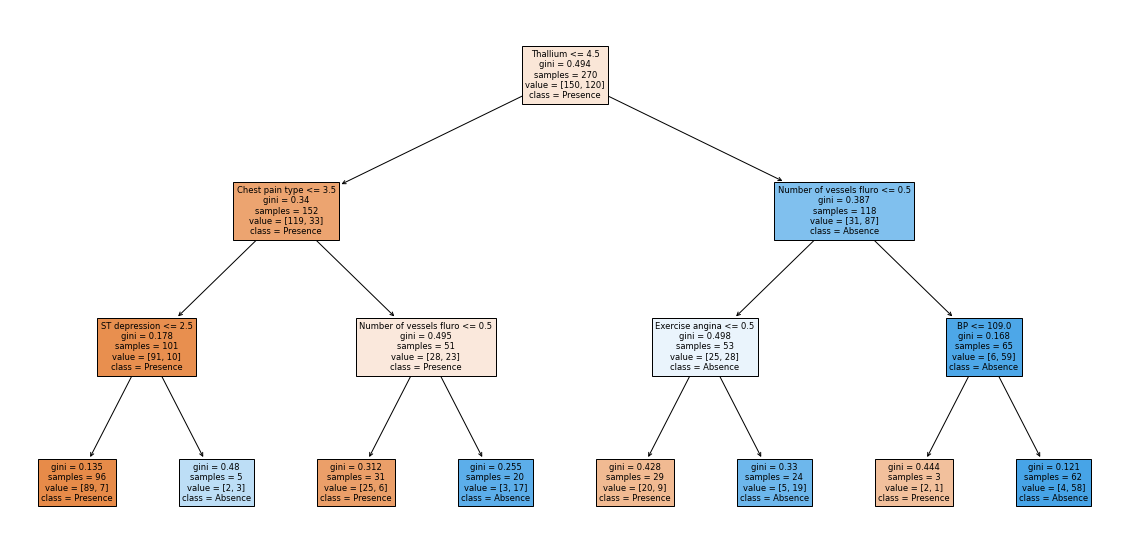

In [36]:
#KARAR AĞAÇLARI
karaAgac_tahmin = DecisionTreeClassifier(max_depth=3) #Ağaç derinliğinin sınırlandırılması
karaAgac_tahmin.fit(one_hot_X, y)
plt.figure(figsize = (20,10))
plot_tree(karaAgac_tahmin,#Karar ağacı görselleştirmesi
          feature_names=one_hot_X.columns,
          class_names=['Presence', 'Absence'],
          filled=True)
plt.show()

In [37]:
#karar ağaçları tahmin karşılaştırma sonuçları
pred = karaAgac_tahmin.predict(one_hot_X)
print("Tahmin karşılaştırması:")
X['Heart_Disease'] = y
X['Tahmin'] = pred
X

Tahmin karşılaştırması:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease,Tahmin
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,Absence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,Presence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence,Absence


In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,pred) #karmaşıklık matrisi

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[136  14]
 [ 23  97]]

True Positives(TP) =  136

True Negatives(TN) =  97

False Positives(FP) =  14

False Negatives(FN) =  23


<AxesSubplot:>

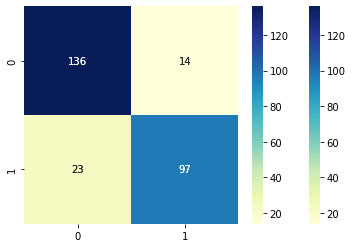

In [39]:

m_matrix= pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
m_matrix= pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y,pred))

              precision    recall  f1-score   support

     Absence       0.86      0.91      0.88       150
    Presence       0.87      0.81      0.84       120

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



In [41]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(one_hot_X,y)
y_pred=svc.predict(one_hot_X)
print('varsayılan hiperparametreler ile test verileri üzerinde doğruluk skoru {0:0.4f}'. format(accuracy_score(y,pred)))

varsayılan hiperparametreler ile test verileri üzerinde doğruluk skoru 0.8630


In [43]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(one_hot_X, y)


DecisionTreeClassifier(random_state=42)

In [44]:
y_prob = dt_classifier.predict_proba(one_hot_X)[:, 1]


In [45]:

data = pd.read_csv('Heart_Disease_Prediction.csv')
data = data.drop(["index"], axis=1)


In [46]:
y = data.Heart_Disease
X = data.drop('Heart_Disease', axis=1)


In [47]:
one_hot_X = pd.get_dummies(X)

In [48]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(one_hot_X, y)


DecisionTreeClassifier(random_state=42)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y, test_size=0.2, random_state=42)


In [50]:
data["Heart_Disease"]=data["Heart_Disease"].map({"Absence":0,"Presence":1})

In [51]:
y_prob = dt_classifier.predict_proba(X_test)[:, 1]